# TWITTER SENTIMENT ANALYSIS

In [74]:
### import require  libraries

In [126]:
import pandas as pd

In [127]:
import numpy as np

In [128]:
from matplotlib import pyplot as plt

In [129]:
import seaborn as sns

In [130]:
import warnings as wr
wr.filterwarnings("ignore")

In [131]:
df=pd.read_csv("twitter.csv",encoding='latin-1')

In [132]:
df

label                                              tweet
0      Positive  im getting on borderlands and i will murder yo...
1      Positive  I am coming to the borders and I will kill you...
2      Positive  im getting on borderlands and i will kill you ...
3      Positive  im coming on borderlands and i will murder you...
4      Positive  im getting on borderlands 2 and i will murder ...
...         ...                                                ...
74677  Positive  Just realized that the Windows partition of my...
74678  Positive  Just realized that my Mac window partition is ...
74679  Positive  Just realized the windows partition of my Mac ...
74680  Positive  Just realized between the windows partition of...
74681  Positive  Just like the windows partition of my Mac is l...

[74682 rows x 2 columns]

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   74682 non-null  object
 1   tweet   73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [134]:
df.isnull().sum()

label      0
tweet    686
dtype: int64

In [135]:
# for remove thee null values
df=df.dropna()

In [136]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   73996 non-null  object
 1   tweet   73996 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


## CLEANING TEXT DATA

In [138]:
import neattext.functions as nfx

In [139]:
import nltk

In [140]:
from nltk.stem.porter import PorterStemmer

In [141]:
ps=PorterStemmer()

In [142]:
# for removeing stopwords we apply function

df["tweet"]=df["tweet"].apply(nfx.remove_stopwords)

In [143]:
df

label                                              tweet
0      Positive                    im getting borderlands murder ,
1      Positive                           coming borders kill all,
2      Positive                   im getting borderlands kill all,
3      Positive                  im coming borderlands murder all,
4      Positive               im getting borderlands 2 murder all,
...         ...                                                ...
74677  Positive  realized Windows partition Mac like 6 years Nv...
74678  Positive  realized Mac window partition 6 years Nvidia d...
74679  Positive  realized windows partition Mac 6 years Nvidia ...
74680  Positive  realized windows partition Mac like 6 years Nv...
74681  Positive  like windows partition Mac like 6 years driver...

[73996 rows x 2 columns]

In [144]:
# for remove  punctuations from text data

df["tweet"]=df["tweet"].apply(nfx.remove_punctuations)

In [145]:
# for removeing html tags we apply function

df["tweet"]=df["tweet"].apply(nfx.remove_html_tags)

In [146]:
df

label                                              tweet
0      Positive                     im getting borderlands murder 
1      Positive                            coming borders kill all
2      Positive                    im getting borderlands kill all
3      Positive                   im coming borderlands murder all
4      Positive                im getting borderlands 2 murder all
...         ...                                                ...
74677  Positive  realized Windows partition Mac like 6 years Nv...
74678  Positive  realized Mac window partition 6 years Nvidia d...
74679  Positive  realized windows partition Mac 6 years Nvidia ...
74680  Positive  realized windows partition Mac like 6 years Nv...
74681  Positive  like windows partition Mac like 6 years driver...

[73996 rows x 2 columns]

In [147]:
import string as str

In [148]:
df["tweet"]=df["tweet"].str.lower()

In [149]:
df["tweet"]=df["tweet"].str.replace("[^a-zA-Z#]", " ")

In [150]:
df["tweet"]=df["tweet"].apply(lambda x: x.split())

In [176]:
tweet=df["tweet"].apply(lambda x :[ps.stem(word) for word in x])

In [177]:
tweet

0                            [im, get, borderland, murder]
1                                [come, border, kill, all]
2                         [im, get, borderland, kill, all]
3                      [im, come, borderland, murder, all]
4                       [im, get, borderland, murder, all]
                               ...                        
74677    [realiz, window, partit, mac, like, year, nvid...
74678    [realiz, mac, window, partit, year, nvidia, dr...
74679    [realiz, window, partit, mac, year, nvidia, dr...
74680    [realiz, window, partit, mac, like, year, nvid...
74681    [like, window, partit, mac, like, year, driver...
Name: tweet, Length: 73996, dtype: object

In [179]:
tweet=tweet.apply(lambda x: " ".join([tweet for tweet in x]))

In [180]:
tweet

0                                 im get borderland murder
1                                     come border kill all
2                               im get borderland kill all
3                            im come borderland murder all
4                             im get borderland murder all
                               ...                        
74677    realiz window partit mac like year nvidia driv...
74678    realiz mac window partit year nvidia driver id...
74679    realiz window partit mac year nvidia driver id...
74680    realiz window partit mac like year nvidia driv...
74681    like window partit mac like year driver idea d...
Name: tweet, Length: 73996, dtype: object

In [181]:
tweet[1]

'come border kill all'

In [182]:
df["tweet"]=tweet

In [186]:
df["tweet"][8]

'spent hour fun know im huge borderland fan maya favorit charact'

In [189]:
df.drop(["clean"],axis=1,inplace=True)

In [191]:
df.head(10)

label                                              tweet
0  Positive                           im get borderland murder
1  Positive                               come border kill all
2  Positive                         im get borderland kill all
3  Positive                      im come borderland murder all
4  Positive                       im get borderland murder all
5  Positive                       im get borderland murder all
6  Positive  spent hour make fun know huge borderland fan m...
7  Positive  spent coupl hour fun know im huge borderland f...
8  Positive  spent hour fun know im huge borderland fan may...
9  Positive  spent hour make fun know huge rhandlerr fan ma...

In [209]:
df["label"].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: label, dtype: int64

In [210]:
label={"Negative":0,"Positive":1,"Neutral":2,"Irrelevant":3}

In [211]:
df["label"]=df["label"].map(label)

In [212]:
df

label                                              tweet
0          1                           im get borderland murder
1          1                               come border kill all
2          1                         im get borderland kill all
3          1                      im come borderland murder all
4          1                       im get borderland murder all
...      ...                                                ...
74677      1  realiz window partit mac like year nvidia driv...
74678      1  realiz mac window partit year nvidia driver id...
74679      1  realiz window partit mac year nvidia driver id...
74680      1  realiz window partit mac like year nvidia driv...
74681      1  like window partit mac like year driver idea d...

[73996 rows x 2 columns]

In [192]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [193]:
from wordcloud import WordCloud

In [197]:
tweet

0                                 im get borderland murder
1                                     come border kill all
2                               im get borderland kill all
3                            im come borderland murder all
4                             im get borderland murder all
                               ...                        
74677    realiz window partit mac like year nvidia driv...
74678    realiz mac window partit year nvidia driver id...
74679    realiz window partit mac year nvidia driver id...
74680    realiz window partit mac like year nvidia driv...
74681    like window partit mac like year driver idea d...
Name: tweet, Length: 73996, dtype: object

# plotting the frequent words

In [201]:
words=" ".join([sentences for sentences in df["tweet"]])

In [202]:
words

'im get borderland murder come border kill all im get borderland kill all im come borderland murder all im get borderland murder all im get borderland murder all spent hour make fun know huge borderland fan maya favorit charact decid wallpap pc origin imag versu creation enjoy pictwittercom mlsi wf jg spent coupl hour fun know im huge borderland fan maya favorit charact decid wallpap pc here origin pictur compar creation made fun pictwittercom mlsi wf jg spent hour fun know im huge borderland fan maya favorit charact spent hour make fun know huge rhandlerr fan maya favorit charact decid wallpap pc origin imag versu creation enjoy pictwittercom mlsi wf jg spent hour make fun know huge rhandlerr fan maya favorit charact decid wallpap pc origin imag versu creation enjoy pictwittercom mlsi wf jg  rockhard la varlop rare power handsom jackpot borderland xbox dlvrit rmtrgf rockhard la varlop rare power handsom jackpot borderland xbox dlvrit rmtrgf rockhard la varlop rare power handsom jackpo

In [203]:
wc=WordCloud(width=800,height=500,max_font_size=100,random_state=42).generate(words)

(-0.5, 799.5, 499.5, -0.5)

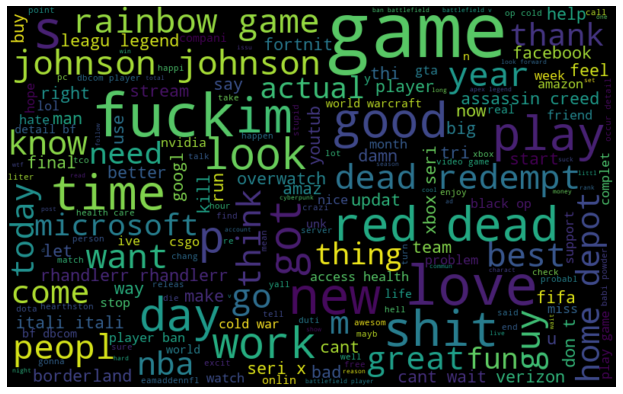

In [206]:
plt.figure(figsize=(18,7))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")

# plotting the positive frequent words

In [219]:
# for plotting of positive label 

positive=" ".join([sentences for sentences in df["tweet"][df["label"]==1]])

In [220]:
positive

'im get borderland murder come border kill all im get borderland kill all im come borderland murder all im get borderland murder all im get borderland murder all spent hour make fun know huge borderland fan maya favorit charact decid wallpap pc origin imag versu creation enjoy pictwittercom mlsi wf jg spent coupl hour fun know im huge borderland fan maya favorit charact decid wallpap pc here origin pictur compar creation made fun pictwittercom mlsi wf jg spent hour fun know im huge borderland fan maya favorit charact spent hour make fun know huge rhandlerr fan maya favorit charact decid wallpap pc origin imag versu creation enjoy pictwittercom mlsi wf jg spent hour make fun know huge rhandlerr fan maya favorit charact decid wallpap pc origin imag versu creation enjoy pictwittercom mlsi wf jg  borderland session long time actual satisfi combat experi got good kill borderland session long time actual satisfi fight experi got good kill borderland session long time actual satisfi combat ex

In [221]:
wc1=WordCloud(width=800,height=500,max_font_size=100,random_state=42).generate(positive)

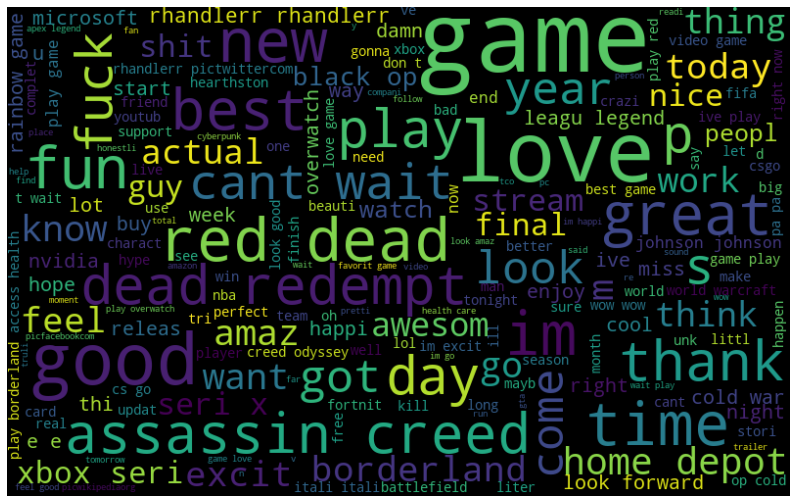

In [230]:
plt.figure(figsize=(15,9))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.show()

# plotting the negative frequent words

In [225]:
negative=" ".join([sentences for sentences in df["tweet"][df["label"]==0]])

In [226]:
wc2=WordCloud(width=800,height=500,max_font_size=100,random_state=42).generate(negative)

In [227]:
negative

'biggest dissappoin life came year ago fuck borderland biggest disappoint life came year ago biggest disappoint life came year ago biggest dissappoin life come year ago fuck borderland biggest male dissappoin life came hang year time ago fuck borderland biggest dissappoin life came year ago fuck borderland man gearbox need fix dissapoint drop new borderland dlc cant fine farm boss mayhem legendari drop drop suck alot man gearbox need fix disappoint drop new borderland dlc farm boss mayhem legendari drop drop elsewher man gearbox need fix disssapoint drop new borderland dlc cant fine farm boss mayhem legendari drop drop suck alot man bethesda need fix dissapoint drop new borderland cant fine farm boss mayhem legendari drop drop suck man gearbox need fix dissapoint drop complet new borderland day dlc cant e fine farm boss mayhem e legendari foot drop drop suck alot gearbox time fix drop new borderland dlc fine forc boss mayhem legendari drop drop need alot like man borderland slick hair 

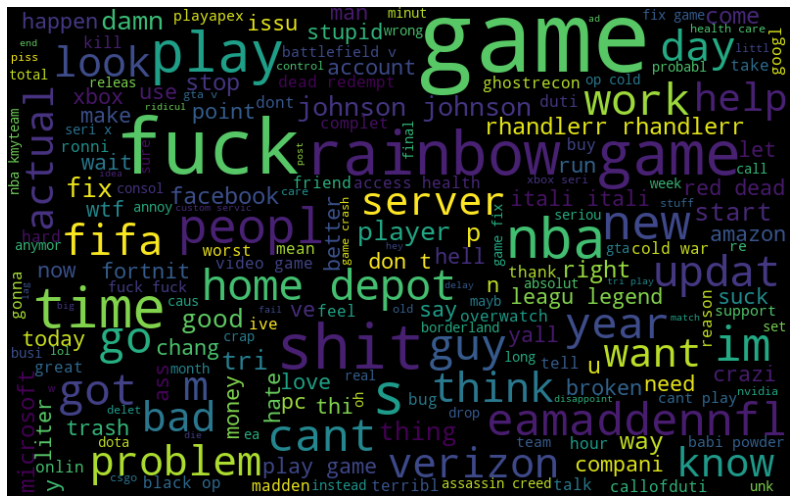

In [231]:
plt.figure(figsize=(15,9))
plt.imshow(wc2,interpolation="bilinear")
plt.axis("off")
plt.show()

In [232]:
# now we ploting the labels

Text(0.5, 0, '0 for negative , 1 for postive  , 2 for neutral , 3 for   irrelevant ')

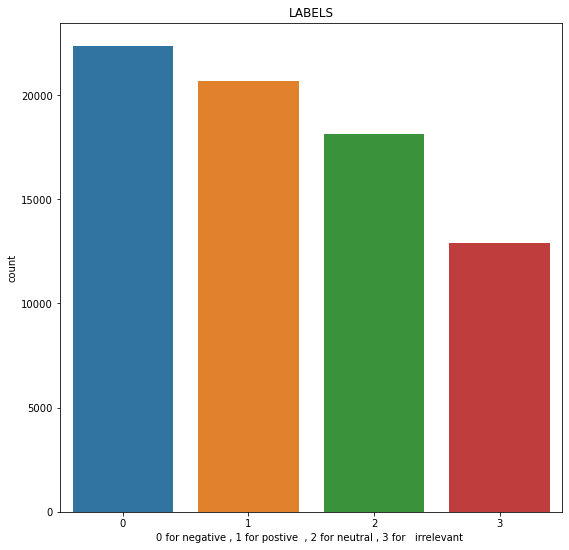

In [248]:
plt.figure(figsize=(9,9))
sns.countplot(df["label"])
plt.title("LABELS")

plt.xlabel("0 for negative , 1 for postive  , 2 for neutral , 3 for   irrelevant ")

# creating pipline

In [249]:
# now we create the pipline

In [251]:
from sklearn.pipeline import Pipeline

In [253]:
from sklearn.feature_extraction.text import CountVectorizer

In [278]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [327]:
model=Pipeline(steps=[("cv",CountVectorizer()),("lr",LogisticRegression())])

## splitting the data 

In [328]:
x=df["tweet"]

In [329]:
y=df["label"]

In [330]:
from sklearn.model_selection import train_test_split

In [337]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)

## fitting data into model

In [338]:
model.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [339]:
model.score(x_test,y_test)

0.807027027027027

In [340]:
y_pred=model.predict(x_test)

In [342]:
pd.DataFrame({"actual_labels":y_test,"predicted_labels":y_pred}).head(20)


actual_labels  predicted_labels
56570              1                 1
54194              0                 0
64054              0                 0
42756              3                 1
38295              0                 0
54208              1                 1
34804              0                 0
11454              3                 3
1124               1                 1
27113              0                 1
37223              0                 0
36198              1                 1
18734              2                 1
61002              3                 3
41376              2                 2
41534              0                 1
62652              2                 2
69577              3                 3
43720              3                 3
39288              2                 2

In [343]:
tweet="now this the new evoluation of nlp"

In [344]:
model.predict([tweet])

array([1], dtype=int64)

In [348]:
model.classes_

array([0, 1, 2, 3], dtype=int64)

In [349]:
model.predict_proba([tweet])

array([[0.32280228, 0.33305772, 0.22239036, 0.12174964]])

## 0 ---> nagative

## 1 ---> positive

## 2 ---> neutral

## 3 ---> Irrelevant

In [350]:
# now we evaluating the model

In [352]:
from sklearn.metrics import confusion_matrix

In [353]:
confusion_matrix(y_pred,y_test)

array([[3742,  252,  285,  228],
       [ 430, 3535,  435,  351],
       [ 176,  189, 2751,  158],
       [ 107,  116,  129, 1916]], dtype=int64)

In [354]:
# now we finding the heatmap of correlation

<AxesSubplot:>

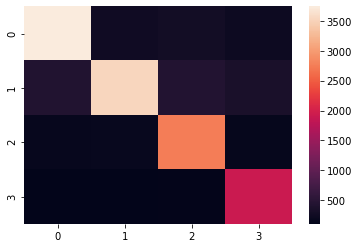

In [355]:
sns.heatmap(confusion_matrix(y_pred,y_test))

In [357]:
from sklearn.metrics import classification_report,accuracy_score

In [359]:
# classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      4455
           1       0.74      0.86      0.80      4092
           2       0.84      0.76      0.80      3600
           3       0.84      0.72      0.78      2653

    accuracy                           0.81     14800
   macro avg       0.81      0.80      0.80     14800
weighted avg       0.81      0.81      0.81     14800



In [360]:
accuracy_score(y_test,y_pred)

0.807027027027027